In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from urllib.request import urlopen
import json
from copy import deepcopy
import seaborn as sns
from collections import Counter
import numpy as np
import requests
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')



In [58]:
ibm_gc = pd.read_csv(r"C:\Users\Study\Desktop\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [59]:
ibm_gc

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [60]:
columns = ["DailyRate", "EmployeeCount", "EmployeeNumber", "HourlyRate", "MonthlyRate", "StandardHours"]
ibm_gc.drop(columns, axis = 1, inplace = True)

In [61]:
ibm_gc

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,Research & Development,23,2,Medical,3,Male,4,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,Research & Development,6,1,Medical,4,Male,2,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,Research & Development,4,3,Life Sciences,2,Male,4,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,Sales,2,3,Medical,4,Male,2,...,3,4,0,17,3,2,9,6,0,8


In [62]:
ibm_gc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   JobInvolvement            1470 non-null   int64 
 10  JobLevel                  1470 non-null   int64 
 11  JobRole                   1470 non-null   object
 12  JobSatisfaction           1470 non-null   int64 
 13  MaritalStatus             1470 non-null   object
 14  MonthlyIncome           

In [63]:
# sns.pairplot(ibm_gc)

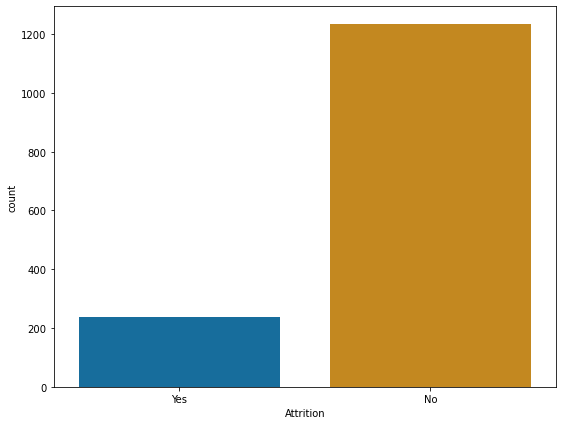

In [64]:
fig, ax = plt.subplots(figsize=(9, 7))
sns.countplot(x =ibm_gc['Attrition'], palette="colorblind"); 

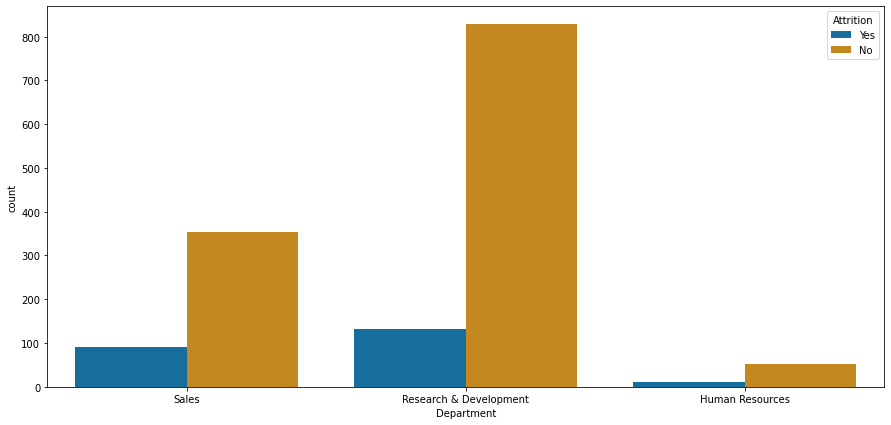

In [65]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.countplot(data = ibm_gc, x = "Department", hue="Attrition", palette="colorblind");

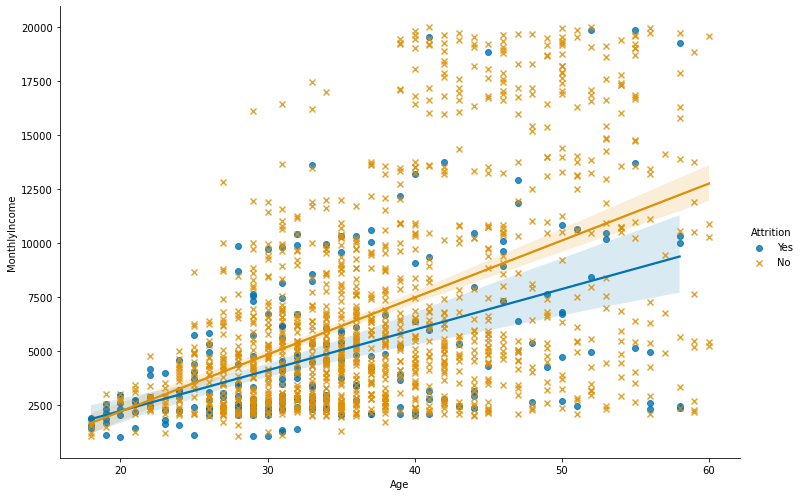

In [143]:
sns.lmplot(x = 'Age', y = 'MonthlyIncome', hue = 'Attrition', data = ibm_gc, height=7, aspect=1.5, markers=["o", "x"], palette="colorblind");
plt.savefig('lmplot.pdf')  
# This function combines regplot() and FacetGrid()

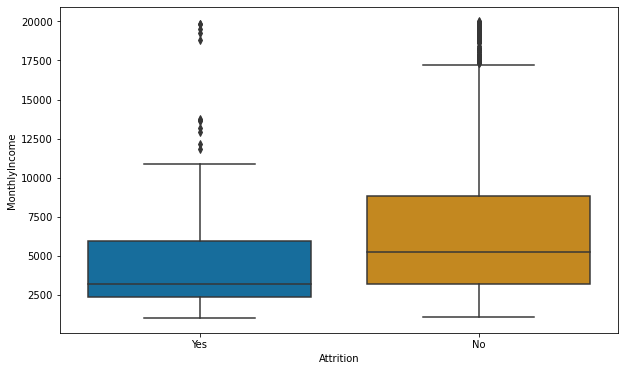

In [67]:
plt.figure(figsize =(10, 6))
sns.boxplot(y ='MonthlyIncome', x ='Attrition', data = ibm_gc, palette="colorblind");

In [68]:
data_corr = ibm_gc.corr()
data_corr

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.001686,0.208034,0.010146,0.029820,0.509604,-0.004892,0.497855,0.299635,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DistanceFromHome,-0.001686,1.000000,0.021042,-0.016075,0.008783,0.005303,-0.003669,-0.017014,-0.029251,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,0.021042,1.000000,-0.027128,0.042438,0.101589,-0.011296,0.094961,0.126317,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,-0.016075,-0.027128,1.000000,-0.008278,0.001212,-0.006784,-0.006259,0.012594,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
JobInvolvement,0.029820,0.008783,0.042438,-0.008278,1.000000,-0.012630,-0.021476,-0.015271,0.015012,-0.017205,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.005303,0.101589,0.001212,-0.012630,1.000000,-0.001944,0.950300,0.142501,-0.034730,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,-0.003669,-0.011296,-0.006784,-0.021476,-0.001944,1.000000,-0.007157,-0.055699,0.020002,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,-0.017014,0.094961,-0.006259,-0.015271,0.950300,-0.007157,1.000000,0.149515,-0.027269,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079
NumCompaniesWorked,0.299635,-0.029251,0.126317,0.012594,0.015012,0.142501,-0.055699,0.149515,1.000000,-0.010238,-0.014095,0.052733,0.030075,0.237639,-0.066054,-0.008366,-0.118421,-0.090754,-0.036814,-0.110319
PercentSalaryHike,0.003634,0.040235,-0.011111,-0.031701,-0.017205,-0.034730,0.020002,-0.027269,-0.010238,1.000000,0.773550,-0.040490,0.007528,-0.020608,-0.005221,-0.003280,-0.035991,-0.001520,-0.022154,-0.011985


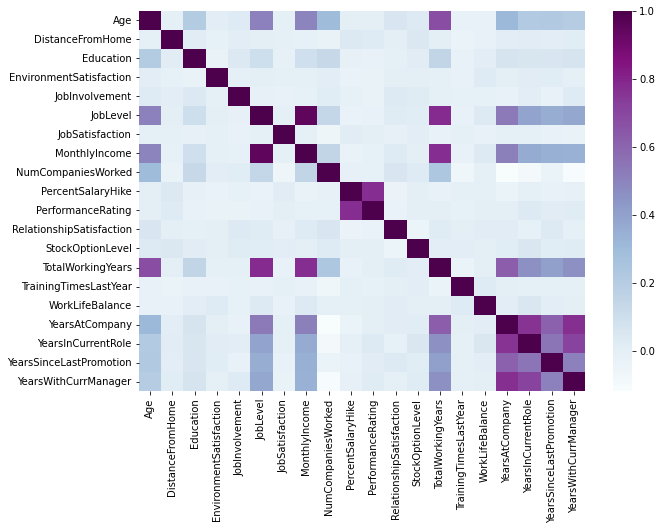

In [69]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(data_corr, xticklabels = data_corr.columns, yticklabels = data_corr.columns, cmap = "BuPu");

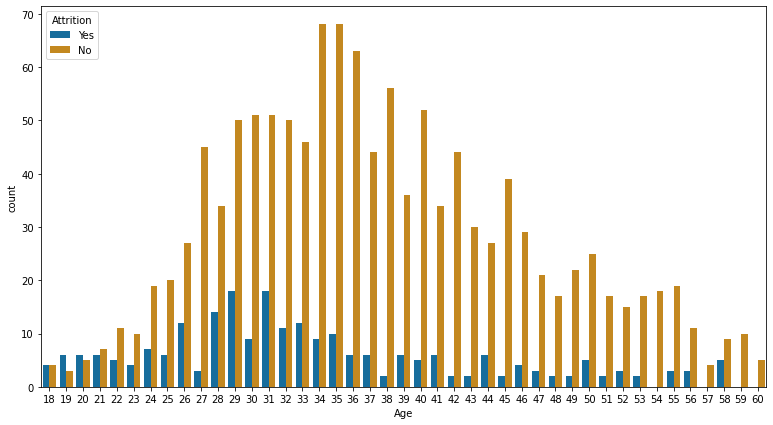

In [144]:
fig, ax = plt.subplots(figsize = (13, 7))
ax = sns.countplot(x = "Age", hue = "Attrition", data = ibm_gc, palette="colorblind")
plt.savefig('Age_plot.pdf')  

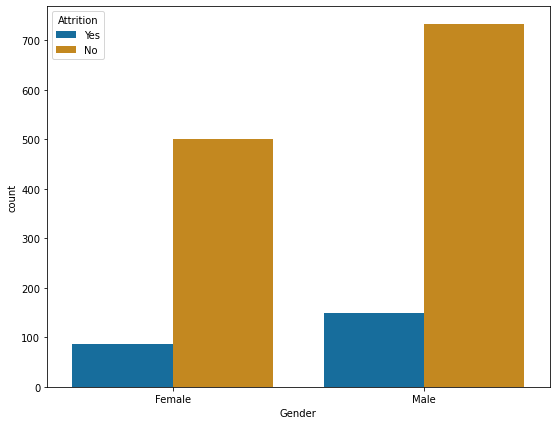

In [71]:
fig, ax = plt.subplots(figsize = (9, 7))
ax = sns.countplot(data = ibm_gc, x = "Gender", hue = "Attrition", palette="colorblind")

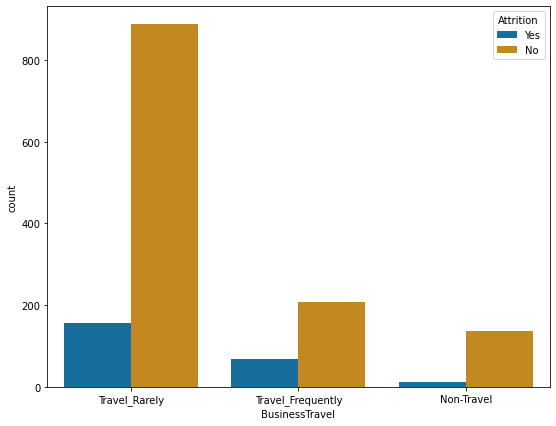

In [145]:
fig, ax = plt.subplots(figsize = (9, 7))
ax = sns.countplot(x = "BusinessTravel", hue = "Attrition", data = ibm_gc, palette="colorblind")
plt.savefig('Travelplot.pdf')  

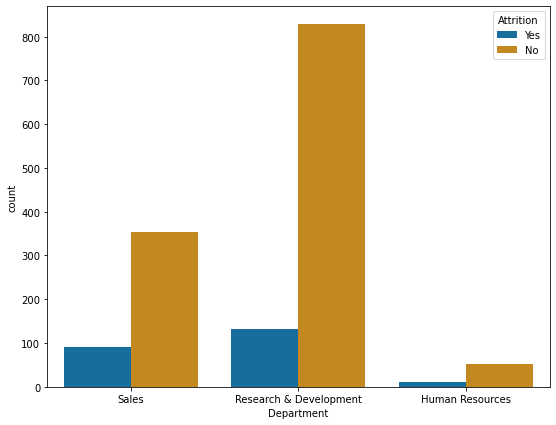

In [146]:
fig, ax = plt.subplots(figsize = (9, 7))
ax = sns.countplot(data = ibm_gc, x = "Department", hue = "Attrition", palette="colorblind")
plt.savefig('department_plot.pdf')  

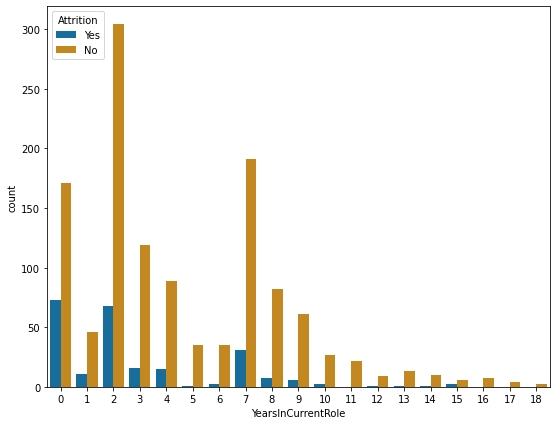

In [147]:
fig, ax = plt.subplots(figsize = (9, 7))
ax = sns.countplot(data = ibm_gc, x = "YearsInCurrentRole", hue = "Attrition", palette="colorblind")
plt.savefig('years_role_plot.pdf')  

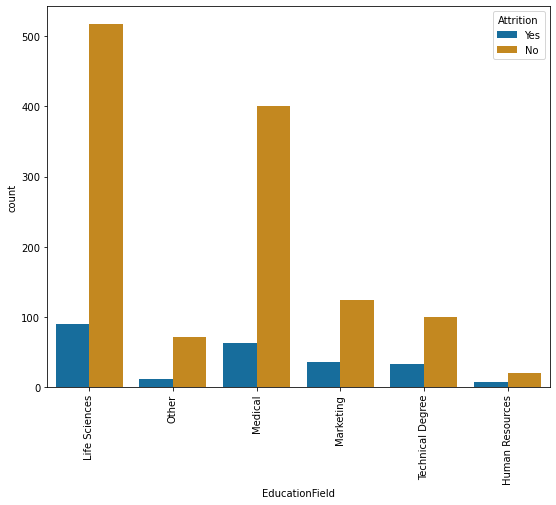

In [148]:
fig, ax = plt.subplots(figsize = (9, 7))
ax = sns.countplot(x = "EducationField", hue = "Attrition", data = ibm_gc, palette="colorblind")
plt.xticks(rotation = 90);
plt.savefig('Education_plot.pdf')  

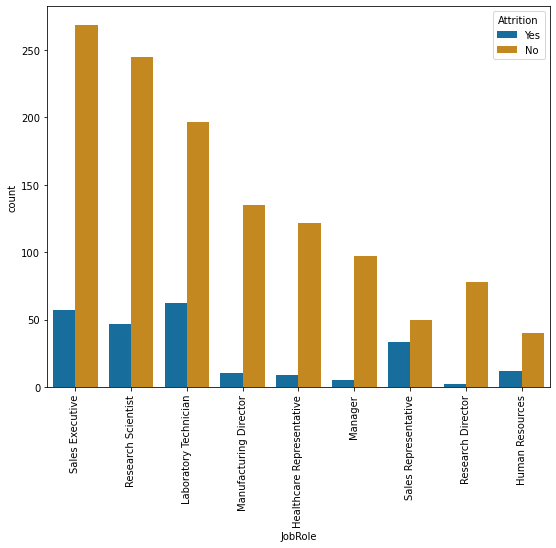

In [149]:
fig, ax = plt.subplots(figsize = (9, 7))
ax = sns.countplot(data = ibm_gc, x = "JobRole", hue = "Attrition", palette="colorblind")
plt.xticks(rotation = 90);
plt.savefig('job_role_plot.pdf')  

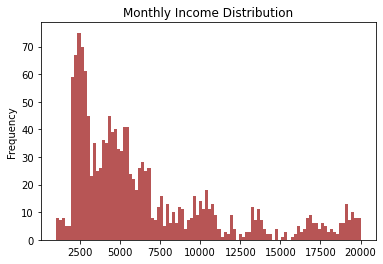

In [77]:
plt.hist(ibm_gc["MonthlyIncome"], bins = 100, alpha = 0.8, color = "brown")
plt.gca().set(title='Monthly Income Distribution', ylabel='Frequency');

In [78]:
for row in ibm_gc["Attrition"]:
    if "Yes" in row:
        plt.hist(ibm_gc["MonthlyIncome"], bins = 100, alpha = 0.8, color = "brown")
    elif "No" in row:
        plt.hist(ibm_gc["MonthlyIncome"], bins = 100, alpha = 0.8, color = "yellow")
    else:
        print("crap")

Error in callback <function flush_figures at 0x000002A075C3FEE0> (for post_execute):



KeyboardInterrupt



In [79]:
office_dict = {"New York" : 1911,
               "Canada" : 1911,
               "France" : 1914,
               "Brazil" : 1917,
               "South Africa" : 1921,
               "Japan" : 1925,
               "China" : 1928,
               "Netherlands" : 1930,
               "World HQ NY" : 1936,
               "Spain" : 1941,
               "Thailand" : 1948,
               "India" : 1951,
               "Singapore" : 1953,
               "Egypt" : 1954,
               "Sweden" : 1954,
               "Switzerland" : 1956,
               "Hong Kong" : 1957,
               "Belgium" : 1958,
               "Denmark" : 1960,
               "Republic of Korea" : 1967,
               "Italy" : 1969,
               "Russia" : 1971,
               "Israel" : 1972,
               "Poland" : 1991,
               "Czech Republic": 1994
              }

In [80]:
url = "https://www.ibm.com/planetwide/"
page = requests.get(url)
soup = BeautifulSoup(page.text, "html.parser")
continents = soup.find_all("ul", attrs={"class" : "ibm-bullet-list"})

In [81]:
loc_list = []
loc_coord = {"country" : []}

for continent in continents:
    loc_list.append(continent.text.split("\n"))

for list in loc_list:
    for item in list:
        loc_coord["country"].append(str(item))
        
df_loc = pd.DataFrame.from_dict(loc_coord)


In [88]:
df_loc.to_csv('./out.csv', index=False)

In [89]:
df_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  219 non-null    object
dtypes: object(1)
memory usage: 1.8+ KB


In [90]:
df_locs = pd.read_csv("out.csv")

In [91]:
df_locs = df_locs.dropna()

In [92]:
df_locs.reset_index().drop(["index"], axis=1)

,country
0,Anguilla
1,Antigua and Barbuda
2,Aruba
3,Bahamas
4,Barbados
...,...
204,Tuvalu
205,Uzbekistan
206,Vanuatu
207,Vietnam


In [93]:
df_locs = df_locs.replace("NetherlandsNorth Macedonia, Republic ofNorway", "Netherlands")

In [94]:
df_locs = df_locs.replace("RÃ©union", "Réunion")

In [95]:
df_locs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209 entries, 1 to 217
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  209 non-null    object
dtypes: object(1)
memory usage: 3.3+ KB


In [141]:
df_locs["lat"] = ""
df_locs["lon"] = ""
df_locs.to_csv('../../df_map.csv', index=False)

In [34]:
loc = "Canada"
location = geolocator.geocode(loc)
print(loc, "Latitude = {}, Longitude = {}".format(location.latitude, location.longitude))

Canada Latitude = 61.0666922, Longitude = -107.991707


In [99]:
df_locs.isna().sum()

country    0
lat        0
lon        0
dtype: int64

In [101]:
df_locs["country"].unique()

array(['Anguilla', 'Antigua and Barbuda', 'Aruba', 'Bahamas', 'Barbados',
       'Bermuda', 'British Virgin Islands', 'Canada', 'Cayman Islands',
       'Curacao', 'Dominica', 'Dominican Republic', 'Grenada', 'Jamaica',
       'Mexico', 'Montserrat', 'Saint Kitts and Nevis', 'Saint Lucia',
       'Saint Vincent and the Grenadines', 'Trinidad and Tobago',
       'Turks and Caicos Islands', 'U.S. Virgin Islands', 'United States',
       'Argentina', 'Belize', 'Bolivia', 'Brazil', 'Chile', 'Colombia',
       'Costa Rica', 'Ecuador', 'El Salvador', 'Falkland Islands',
       'French Guiana', 'Guadeloupe', 'Guatemala', 'Guyana', 'Haiti',
       'Honduras', 'Martinique', 'Nicaragua', 'Panama', 'Paraguay',
       'Peru', 'Suriname', 'Uruguay', 'Venezuela', 'Albania', 'Andorra',
       'Armenia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium',
       'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Estonia', 'Faroe Islands', 'Finland',
       'Fran

In [104]:
test_dict = df_locs.to_dict()
test_dict

{'country': {1: 'Anguilla',
  2: 'Antigua and Barbuda',
  3: 'Aruba',
  4: 'Bahamas',
  5: 'Barbados',
  6: 'Bermuda',
  7: 'British Virgin Islands',
  8: 'Canada',
  9: 'Cayman Islands',
  10: 'Curacao',
  11: 'Dominica',
  12: 'Dominican Republic',
  13: 'Grenada',
  14: 'Jamaica',
  15: 'Mexico',
  16: 'Montserrat',
  17: 'Saint Kitts and Nevis',
  18: 'Saint Lucia',
  19: 'Saint Vincent and the Grenadines',
  20: 'Trinidad and Tobago',
  21: 'Turks and Caicos Islands',
  22: 'U.S. Virgin Islands',
  23: 'United States',
  26: 'Argentina',
  27: 'Belize',
  28: 'Bolivia',
  29: 'Brazil',
  30: 'Chile',
  31: 'Colombia',
  32: 'Costa Rica',
  33: 'Ecuador',
  34: 'El Salvador',
  35: 'Falkland Islands',
  36: 'French Guiana',
  37: 'Guadeloupe',
  38: 'Guatemala',
  39: 'Guyana',
  40: 'Haiti',
  41: 'Honduras',
  42: 'Martinique',
  43: 'Nicaragua',
  44: 'Panama',
  45: 'Paraguay',
  46: 'Peru',
  47: 'Suriname',
  48: 'Uruguay',
  49: 'Venezuela',
  52: 'Albania',
  53: 'Andorra',

In [111]:
pd_despair = pd.read_csv("../../world_country_and_usa_states_latitude_and_longitude_values.csv")

In [112]:
pd_despair

,country_code,latitude,longitude,country,usa_state_code,usa_state_latitude,usa_state_longitude,usa_state
0,AD,42.546245,1.601554,Andorra,AK,63.588753,-154.493062,Alaska
1,AE,23.424076,53.847818,United Arab Emirates,AL,32.318231,-86.902298,Alabama
2,AF,33.939110,67.709953,Afghanistan,AR,35.201050,-91.831833,Arkansas
3,AG,17.060816,-61.796428,Antigua and Barbuda,AZ,34.048928,-111.093731,Arizona
4,AI,18.220554,-63.068615,Anguilla,CA,36.778261,-119.417932,California
...,...,...,...,...,...,...,...,...
240,YE,15.552727,48.516388,Yemen,NaN,NaN,NaN,NaN
241,YT,-12.827500,45.166244,Mayotte,NaN,NaN,NaN,NaN
242,ZA,-30.559482,22.937506,South Africa,NaN,NaN,NaN,NaN
243,ZM,-13.133897,27.849332,Zambia,NaN,NaN,NaN,NaN


In [123]:
map_df = pd.DataFrame()
map_df = pd.merge(df_locs, pd_despair, on=['country'], how='inner')
clmns = ["lat", "lon", "country_code", "usa_state_code", "usa_state_latitude", "usa_state_longitude", "usa_state"]
map_df.drop(clmns, axis = 1, inplace = True)


In [124]:
map_df

,country,latitude,longitude
0,Anguilla,18.220554,-63.068615
1,Antigua and Barbuda,17.060816,-61.796428
2,Aruba,12.521110,-69.968338
3,Bahamas,25.034280,-77.396280
4,Barbados,13.193887,-59.543198
...,...,...,...
190,Tuvalu,-7.109535,177.649330
191,Uzbekistan,41.377491,64.585262
192,Vanuatu,-15.376706,166.959158
193,Vietnam,14.058324,108.277199


In [142]:
map_df.to_csv('../../outmap.csv', index=False)

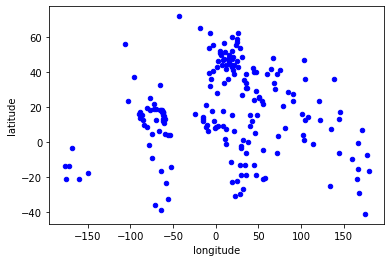

In [132]:
map_df.plot(x="longitude", y="latitude", kind="scatter", c="blue", colormap="YlOrRd");